# 1. Load Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('bank/bank-full.csv', sep=';')
print(df.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


# 2. Preprocess the Data

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df.drop('y', axis=1), drop_first=True)

# Add target column back
df_encoded['y'] = df['y']


# 3. Split Data into Train/Test

In [4]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#  4. Train Decision Tree Classifier

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')


[[11086   880]
 [  856   742]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11966
           1       0.46      0.46      0.46      1598

    accuracy                           0.87     13564
   macro avg       0.69      0.70      0.69     13564
weighted avg       0.87      0.87      0.87     13564

Accuracy: 0.87


# 5. Visualize the Tree

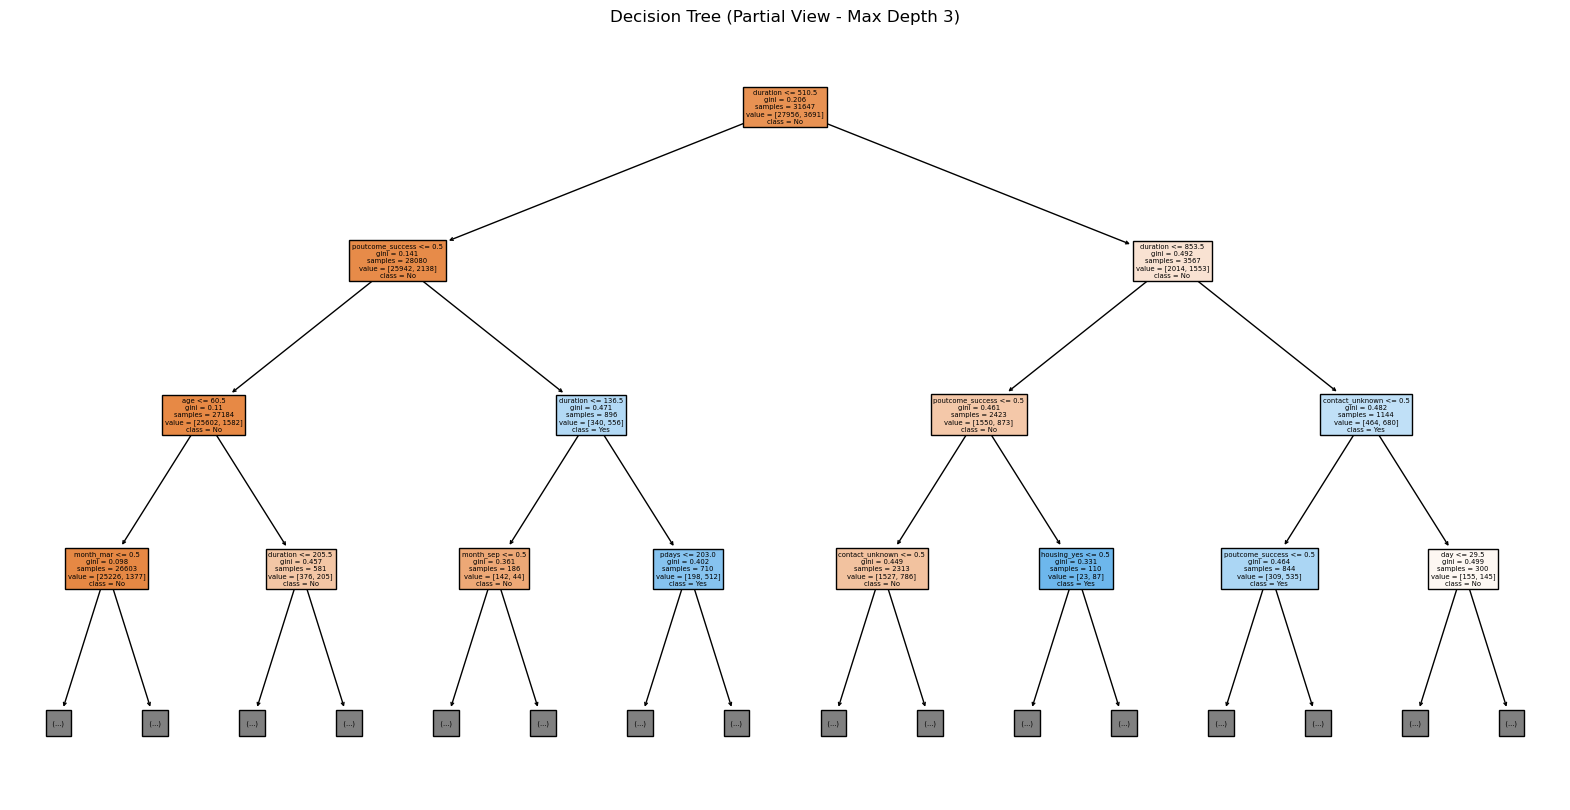

In [6]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, max_depth=3)
plt.title("Decision Tree (Partial View - Max Depth 3)")
plt.show()

